## 问题3数学建模过程

### 1. 问题描述

将16个加工原料进行混合，全部放入9个加工窖中。请建立数学模型，求出平均能耗率超过80%的加工包数量最多的混合方案，并给出每个加工包的能耗率，并将结果填入表3。

### 2. 数学模型

#### 变量定义

- **$x_{ij}$**：原料 $i$ 分配到加工窖 $j$ 的重量，其中 $i \in \{1, 2, \ldots, 16\}$，$j \in \{1, 2, \ldots, 9\}$。
- **$z_j$**：加工窖 $j$ 的平均能耗率是否超过80%，$z_j \in \{0, 1\}$，其中 $j \in \{1, 2, \ldots, 9\}$。
- **$e_i$**：原料 $i$ 的能耗率。

#### 目标函数

最大化平均能耗率超过80%的加工包数量。

目标函数表示为：

$$
\text{Maximize} \sum_{j=1}^{9} z_j
$$

#### 约束条件

1. **每种原料必须分配到一个加工窖中**：

$$
\sum_{j=1}^{9} x_{ij} = w_i \quad \forall i \in \{1, 2, \ldots, 16\}
$$

其中，$w_i$ 表示原料 $i$ 的总重量。

2. **每个加工窖的重量必须在限定范围内**：

$$
S_j^{\min} \leq \sum_{i=1}^{16} x_{ij} \leq S_j^{\max} \quad \forall j \in \{1, 2, \ldots, 9\}
$$

其中，$S_j^{\min}$ 和 $S_j^{\max}$ 分别为加工窖 $j$ 的最小和最大重量。

3. **辅助变量 $z_j$ 的约束，用于判断加工包的平均能耗率是否超过80%**：

$$
\sum_{i=1}^{16} x_{ij} e_i \geq 0.80 \sum_{i=1}^{16} x_{ij} - M (1 - z_j) \quad \forall j \in \{1, 2, \ldots, 9\}
$$

$$
\sum_{i=1}^{16} x_{ij} e_i \leq 0.80 \sum_{i=1}^{16} x_{ij} + M z_j \quad \forall j \in \{1, 2, \ldots, 9\}
$$

其中，$e_i$ 为原料 $i$ 的能耗率，$M$ 是一个足够大的常数。

### 3. 数学表达式详解

1. **变量定义**：
    - $x_{ij}$ 表示原料 $i$ 分配到加工窖 $j$ 的重量。
    - $z_j$ 表示加工窖 $j$ 的平均能耗率是否超过80%。
    - $e_i$ 表示原料 $i$ 的能耗率。
    - $w_i$ 表示原料 $i$ 的总重量。

2. **目标函数**：
    - 最大化平均能耗率超过80%的加工包数量：
      $$
      \text{Maximize} \sum_{j=1}^{9} z_j
      $$

3. **约束条件**：
    - 每种原料必须分配到一个加工窖中：
      $$
      \sum_{j=1}^{9} x_{ij} = w_i \quad \forall i \in \{1, 2, \ldots, 16\}
      $$
    - 每个加工窖的重量必须在限定范围内：
      $$
      S_j^{\min} \leq \sum_{i=1}^{16} x_{ij} \leq S_j^{\max} \quad \forall j
      $$
    - 判断加工包的平均能耗率是否超过80%：
      $$
      \sum_{i=1}^{16} x_{ij} e_i \geq 0.80 \sum_{i=1}^{16} x_{ij} - M (1 - z_j) \quad \forall j
      $$
      $$
      \sum_{i=1}^{16} x_{ij} e_i \leq 0.80 \sum_{i=1}^{16} x_{ij} + M z_j \quad \forall j
      $$


In [1]:
import numpy as np
import pandas as pd
import pulp
import warnings
warnings.filterwarnings("ignore", category=UserWarning, message=".*Glyph.*")

In [2]:
# 原料数据
raw_data = {
    '品种代码': list(range(1, 17)),
    '总重量千克': [300, 500, 200, 500, 300, 400, 300, 300, 400, 600, 100, 600, 500, 400, 300, 300],
    '效能率': [0.88, 0.60, 0.93, 0.90, 0.90, 0.78, 0.70, 0.83, 0.95, 0.87, 0.65, 0.75, 0.80, 0.68, 0.87, 0.83],
    '位点基因序列': [
        ['a', 'b', 'c', 'd', 'e', 'f', 'g', 'h', 'i', 'j'],
        ['a', 'b', 'c', 'd', 'e', 'o', 'p', 'k', 'l', 'm'],
        ['f', 'g', 'h', 'a', 'j', 'o', 'p', 'k', 'l', 'm'],
        ['f', 'g', 'h', 'i', 'j', 'l', 'p', 'f', 'o', 'p'],
        ['f', 'b', 'h', 'd', 'e', 'o', 'p', 'a', 'o', 'z'],
        ['r', 'm', 't', 'u', 'q', 'f', 'g', 'a', 'f', 'z'],
        ['r', 's', 't', 'u', 'k', 'f', 'g', 'h', 'f', 'c'],
        ['r', 's', 't', 'u', 'a', 'b', 'h', 'i', 'j', 'c'],
        ['c', 's', 'a', 'f', 'v', 'w', 'a', 'i', 'j', 'c'],
        ['b', 'm', 'n', 'i', 'a', 'z', 'h', 'f', 'o', 'z'],
        ['m', 'a', 'm', 'e', 'a', 'z', 'a', 'b', 'a', 'b'],
        ['m', 'c', 'm', 'e', 'x', 'h', 'a', 'b', 'n', 'a'],
        ['b', 'a', 'n', 'y', 'c', 'g', 'm', 'b', 'm', 'b'],
        ['m', 'c', 'm', 'y', 'x', 'g', 'm', 'b', 'n', 'b'],
        ['b', 'x', 'n', 'i', 'c', 'l', 'b', 'c', 'm', 'p'],
        ['c', 'c', 'a', 'f', 'x', 'h', 'b', 'c', 'm', 'j']
    ]
}

weights = raw_data['总重量千克']
efficiency = raw_data['效能率']
genes = raw_data['位点基因序列']

# 加工窖信息
silos = [
    {"id": 1, "min_weight": 300, "max_weight": 600, "fixed_cost": 400, "variable_cost": 2},
    {"id": 2, "min_weight": 300, "max_weight": 600, "fixed_cost": 400, "variable_cost": 2},
    {"id": 3, "min_weight": 300, "max_weight": 600, "fixed_cost": 400, "variable_cost": 2},
    {"id": 4, "min_weight": 600, "max_weight": 900, "fixed_cost": 500, "variable_cost": 1.8},
    {"id": 5, "min_weight": 600, "max_weight": 900, "fixed_cost": 500, "variable_cost": 1.8},
    {"id": 6, "min_weight": 600, "max_weight": 900, "fixed_cost": 500, "variable_cost": 1.8},
    {"id": 7, "min_weight": 900, "max_weight": 1200, "fixed_cost": 600, "variable_cost": 1.6},
    {"id": 8, "min_weight": 900, "max_weight": 1200, "fixed_cost": 600, "variable_cost": 1.6},
    {"id": 9, "min_weight": 900, "max_weight": 1200, "fixed_cost": 600, "variable_cost": 1.6}
]


In [3]:

# 创建优化问题
prob = pulp.LpProblem("Maximize_Efficiency", pulp.LpMaximize)

# 决策变量
x = pulp.LpVariable.dicts("x", ((i, j) for i in range(1, 17) for j in range(1, 10)), cat='Continuous', lowBound=0)
z = pulp.LpVariable.dicts("z", (j for j in range(1, 10)), cat='Binary')

# 定义大M
M = 1000000

# 目标函数：最大化平均能耗率超过80%的加工包数量
prob += pulp.lpSum(z[j] for j in range(1, 10))

# 约束条件
# 1. 每种原料必须分配到一个加工窖中
for i in range(1, 17):
    prob += pulp.lpSum(x[i, j] for j in range(1, 10)) == weights[i-1]

# 2. 每个加工窖的重量必须在限定范围内
for j in range(1, 10):
    prob += pulp.lpSum(x[i, j] for i in range(1, 17)) <= silos[j-1]["max_weight"]
    prob += pulp.lpSum(x[i, j] for i in range(1, 17)) >= silos[j-1]["min_weight"]

# 3. 辅助变量z[j]的约束，用于判断加工包的平均能耗率是否超过80%
for j in range(1, 10):
    prob += pulp.lpSum(x[i, j] * efficiency[i-1] for i in range(1, 17)) - 0.80 * pulp.lpSum(x[i, j] for i in range(1, 17)) >= -M * (1 - z[j])
    prob += pulp.lpSum(x[i, j] * efficiency[i-1] for i in range(1, 17)) - 0.80 * pulp.lpSum(x[i, j] for i in range(1, 17)) <= M * z[j]

# 求解问题
prob.solve()

# 输出结果
solution = np.zeros((16, 9))
efficiency_results = []

for j in range(1, 10):
    silo_weight = sum(pulp.value(x[i, j]) for i in range(1, 17))
    if silo_weight > 0:
        silo_efficiency = sum(pulp.value(x[i, j]) * efficiency[i-1] for i in range(1, 17)) / silo_weight
    else:
        silo_efficiency = 0
    efficiency_results.append(silo_efficiency)
    for i in range(1, 17):
        solution[i-1, j-1] = pulp.value(x[i, j])



Welcome to the CBC MILP Solver 
Version: 2.10.3 
Build Date: Dec 15 2019 

command line - /Users/yooky/anaconda3/lib/python3.11/site-packages/pulp/solverdir/cbc/osx/64/cbc /var/folders/ng/h1_4zcsj2qq895j6xpxvjyqh0000gn/T/c94ecc930f744105b3cb5d916c0217c7-pulp.mps -max -timeMode elapsed -branch -printingOptions all -solution /var/folders/ng/h1_4zcsj2qq895j6xpxvjyqh0000gn/T/c94ecc930f744105b3cb5d916c0217c7-pulp.sol (default strategy 1)
At line 2 NAME          MODEL
At line 3 ROWS
At line 57 COLUMNS
At line 823 RHS
At line 876 BOUNDS
At line 886 ENDATA
Problem MODEL has 52 rows, 153 columns and 720 elements
Coin0008I MODEL read with 0 errors
Option for timeMode changed from cpu to elapsed
Continuous objective value is 9 - 0.00 seconds
Cgl0004I processed model has 34 rows, 153 columns (9 integer (9 of which binary)) and 432 elements
Cutoff increment increased from 1e-05 to 0.9999
Cbc0038I Initial state - 0 integers unsatisfied sum - 0
Cbc0038I Solution found of -9
Cbc0038I Relaxing continuo

In [4]:
# 生成表3
table3_weights = pd.DataFrame(solution, columns=[f"加工窖{j}" for j in range(1, 10)], index=[f"原料{i}" for i in range(1, 17)])
table3_efficiency = pd.DataFrame(efficiency_results, columns=["能耗率"], index=[f"加工窖{j}" for j in range(1, 10)])
table3 = pd.concat([table3_weights, table3_efficiency.T], axis=0)

# 保留两位小数
table3 = table3.applymap(lambda x: f"{x:.2f}")

# 保存结果并显示
table3.T.to_csv('问题3结果.csv', index_label='加工窖')
print("表3 问题3的结果（每个加工窖所含每种加工原料的重量，千克）")
print(table3.T)

表3 问题3的结果（每个加工窖所含每种加工原料的重量，千克）
         原料1     原料2     原料3     原料4     原料5     原料6     原料7     原料8     原料9  \
加工窖1    0.00    0.00    0.00   50.00    0.00    0.00   50.00    0.00    0.00   
加工窖2    0.00  100.00    0.00  200.00    0.00    0.00    0.00    0.00    0.00   
加工窖3    0.00    0.00   23.19  123.33    0.00    0.00  153.48    0.00    0.00   
加工窖4    0.00   65.65    0.00    0.00  137.83    0.00   96.52  300.00    0.00   
加工窖5    0.00   40.00    0.00    0.00  160.00  400.00    0.00    0.00    0.00   
加工窖6  300.00   21.01    0.00    0.00    2.17    0.00    0.00    0.00    0.00   
加工窖7    0.00    0.00  176.81    0.00    0.00    0.00    0.00    0.00    0.00   
加工窖8    0.00   59.05    0.00  126.67    0.00    0.00    0.00    0.00  314.29   
加工窖9    0.00  214.29    0.00    0.00    0.00    0.00    0.00    0.00   85.71   

        原料10    原料11    原料12    原料13    原料14    原料15    原料16   能耗率  
加工窖1    0.00    0.00    0.00  500.00    0.00    0.00    0.00  0.80  
加工窖2    0.00    0.00    0.00  

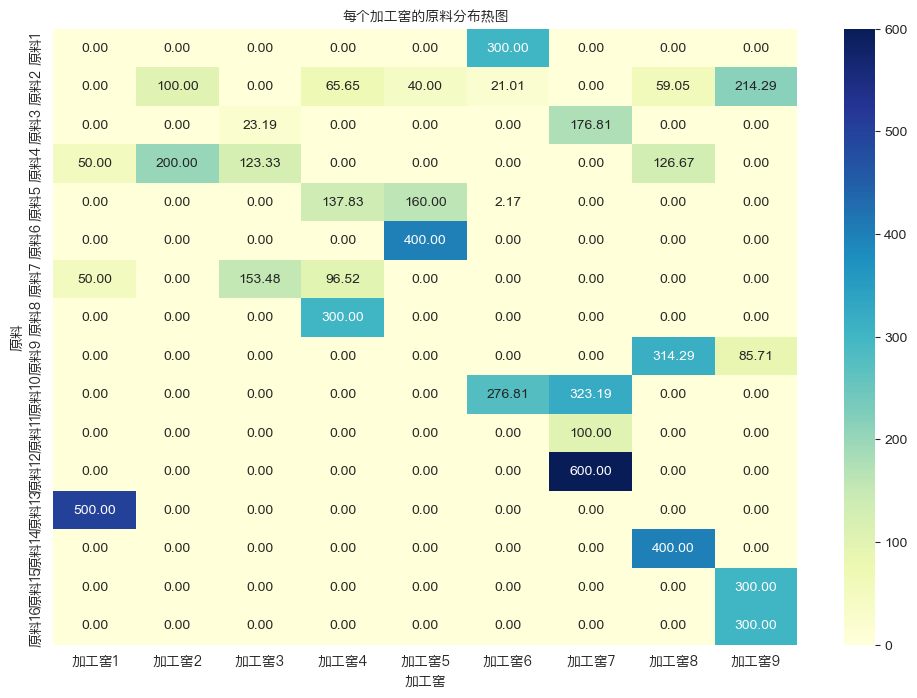

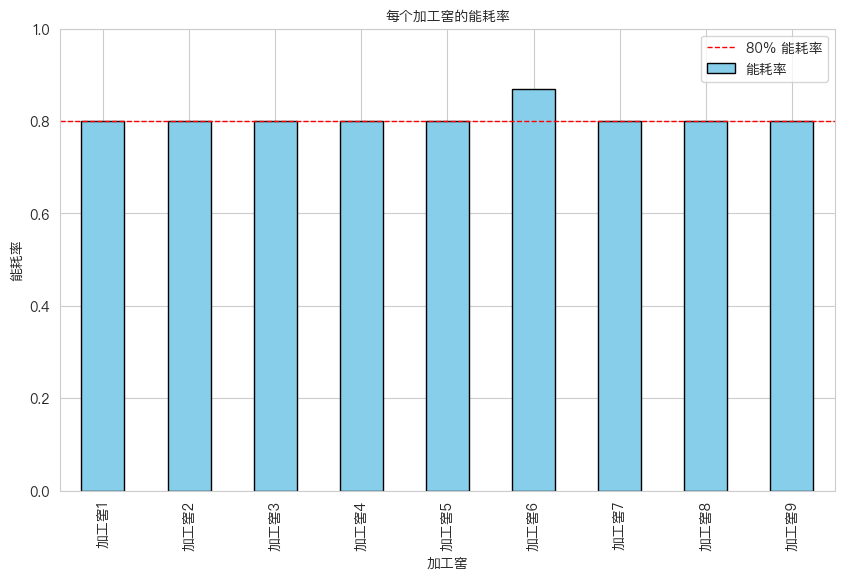

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.font_manager import FontProperties

results = pd.read_csv('问题3结果.csv', index_col='加工窖')

# 将原料重量部分和能耗率部分分开
weights = results.drop(columns=["能耗率"])
efficiencies = results["能耗率"]

font_path = '/System/Library/Fonts/PingFang.ttc'
my_font = FontProperties(fname=font_path)

# 绘制每个加工窖的原料分布热图
plt.figure(figsize=(12, 8))
sns.heatmap(weights.T, annot=True, fmt=".2f", cmap="YlGnBu", cbar=True)
plt.title('每个加工窖的原料分布热图', fontproperties=my_font)
plt.xlabel('加工窖', fontproperties=my_font)
plt.ylabel('原料', fontproperties=my_font)
plt.xticks(fontproperties=my_font)
plt.yticks(fontproperties=my_font)
plt.show()

# 绘制每个加工窖的能耗率
plt.figure(figsize=(10, 6))
efficiencies.plot(kind='bar', color='skyblue', edgecolor='black')
plt.axhline(y=0.80, color='red', linestyle='--', linewidth=1, label='80% 能耗率')
plt.title('每个加工窖的能耗率', fontproperties=my_font)
plt.xlabel('加工窖', fontproperties=my_font)
plt.ylabel('能耗率', fontproperties=my_font)
plt.xticks(fontproperties=my_font)
plt.yticks(fontproperties=my_font)
plt.ylim(0, 1)
plt.legend(prop=my_font)
plt.show()